In [2]:
from datetime import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load statistics

In [36]:
FIGURE_OUTPUT_DIR = Path("output/figures/statistics")
FIGURE_OUTPUT_DIR.mkdir(exist_ok=True)

STATS_BASE_DIR = Path("output/statistics/hist/")

separated_mu = pd.read_csv(STATS_BASE_DIR / "tf100ms_2_separated_mu" / "all_fragments.csv")
classified_mu = pd.read_csv(STATS_BASE_DIR / "tf100ms_3_classified_mu" / "all_fragments.csv")
classified_pf = pd.read_csv(STATS_BASE_DIR / "tf100ms_3_classified_pf" / "all_fragments.csv")

print(separated_mu.columns)
print(classified_mu.columns)
print(classified_pf.columns)

classified_pf.head()

Index(['scene', 'instance_id', 'fragment_id', 'class', 'traj_evnt_count',
       'traj_len_s', 'frag_evnt_count', 'frag_len_s'],
      dtype='object')
Index(['scene', 'instance_id', 'fragment_id', 'class', 'traj_evnt_count',
       'traj_len_s', 'frag_evnt_count', 'frag_len_s'],
      dtype='object')
Index(['scene', 'instance_id', 'fragment_id', 'class', 'traj_evnt_count',
       'traj_len_s', 'frag_evnt_count', 'frag_len_s'],
      dtype='object')


,scene,instance_id,fragment_id,class,traj_evnt_count,traj_len_s,frag_evnt_count,frag_len_s
0,hauptsächlichBienen1,0,0,bee,22690,3.578,808,0.1
1,hauptsächlichBienen1,0,1,bee,22690,3.578,629,0.1
2,hauptsächlichBienen1,0,2,bee,22690,3.578,724,0.1
3,hauptsächlichBienen1,0,3,bee,22690,3.578,761,0.1
4,hauptsächlichBienen1,0,4,bee,22690,3.578,847,0.1


In [29]:
# clear class names for datasets not yet classified
separated_mu["class"] = "unclassified"
display(separated_mu.head())

,scene,instance_id,fragment_id,class,traj_evnt_count,traj_len_s,frag_evnt_count,frag_len_s
0,1_l-l-l,0,0,unclassified,1015970,40.426,43,0.1
1,1_l-l-l,0,1,unclassified,1015970,40.426,14,0.1
2,1_l-l-l,0,2,unclassified,1015970,40.426,290,0.1
3,1_l-l-l,0,3,unclassified,1015970,40.426,630,0.1
4,1_l-l-l,0,4,unclassified,1015970,40.426,450,0.1


In [41]:
# Combine dataframes
classified_mu_scenes = classified_mu["scene"].unique()
combined_mu = separated_mu[~separated_mu["scene"].isin(classified_mu_scenes)]
print(combined_mu["scene"].unique())
combined_mu = pd.concat([combined_mu, classified_mu])

# combine all
df = pd.concat([combined_mu, classified_pf])
display(df["scene"].unique())
print("Total fragment count:", len(df))

['1_l-l-l' '2_l-h-l' '4_m-m-h' '5_h-l-h' '6_h-h-h_filtered']


array(['1_l-l-l', '2_l-h-l', '4_m-m-h', '5_h-l-h', '6_h-h-h_filtered',
       '3_m-h-h', 'hauptsächlichBienen1', 'libellen1',
       'vieleSchmetterlinge2', 'wespen1', 'wespen2'], dtype=object)

Total fragment count: 8819


## Class overview

In [30]:
# gesucht: Anzahl instances pro Klasse
# group by class
# unique over scene and instance_id
df1 = df.groupby("class").apply(lambda x: len(x[["scene", "instance_id"]].drop_duplicates()))
display(df1)

# plt.figure(figsize=(8,4))
# plt.bar(df1.index, df1)
# plt.title("Number of fragments per class")
# plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
# plt.show()

class
bee              55
butterfly        22
dragonfly        22
insect           52
unclassified    152
wasp             11
dtype: int64

class
bee             3473
butterfly       1078
dragonfly        214
insect           349
unclassified    3308
wasp             397
dtype: int64


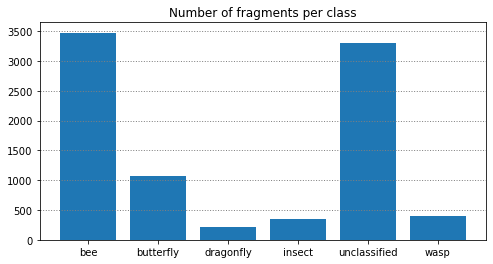

In [26]:
df1 = df.groupby("class").size()
display(df1)

plt.figure(figsize=(8,4))
plt.bar(df1.index, df1)
plt.title("Number of fragments per class")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()

In [ ]:
df1 = df.groupby(["class"]).mean()[["traj_evnt_count", "traj_len_s", "frag_evnt_count"]]
df1

,traj_evnt_count,traj_len_s,frag_evnt_count
class,,,
bee,144018.084941,20.321331,586.678376
butterfly,101125.917440,8.350932,2152.567718
dragonfly,31494.831776,1.082037,3236.490654
insect,42376.627507,0.994390,4290.386819
unclassified,352229.665961,14.669817,5068.604595
wasp,57169.659950,9.952068,547.120907


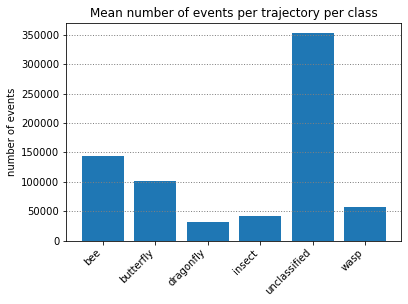

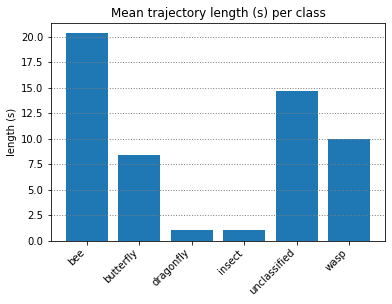

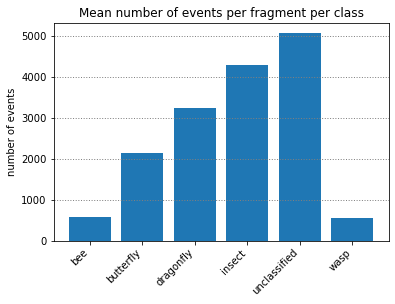

In [ ]:
plt.bar(df1.index, df1["traj_evnt_count"])
plt.title("Mean number of events per trajectory per class")
plt.xticks(rotation=45, ha="right")
# plt.xlabel("Class")
plt.ylabel("number of events")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()

plt.bar(df1.index, df1["traj_len_s"])
plt.title("Mean trajectory length (s) per class")
plt.xticks(rotation=45, ha="right")
# plt.xlabel("Class")
plt.ylabel("length (s)")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()

plt.bar(df1.index, df1["frag_evnt_count"])
plt.title("Mean number of events per fragment per class")
plt.xticks(rotation=45, ha="right")
# plt.xlabel("Class")
plt.ylabel("number of events")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()


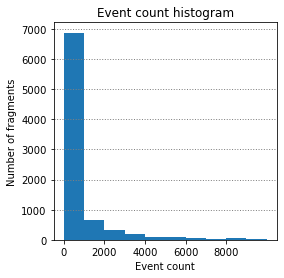

In [46]:
plt.figure(figsize=(4,4))
plt.hist(df["frag_evnt_count"], bins=list(range(0, 1000*10+1, 1000)))
plt.title("Event count histogram")
plt.xlabel("Event count")
plt.xticks(np.arange(0, 1000*10, 2000))
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.savefig(FIGURE_OUTPUT_DIR/"Event count histogram.png", format="png", bbox_inches="tight", dpi=200)
plt.show()

In [ ]:
df1 = df[df["frag_evnt_count"] >= 4096 ]["scene"].count()
print("Number of fragments over all scenes with >= 4096 events:", df1)

df1 = df[df["frag_evnt_count"] >= 4096//2 ]["scene"].count()
print("Number of fragments over all scenes with >= 2048 events:", df1)

Number of fragments over all scenes with >= 4096 events: 765
Number of fragments over all scenes with >= 2048 events: 1276


scene
1_l-l-l                 1112
2_l-h-l                  590
3_m-h-h                 3075
4_m-m-h                  518
5_h-l-h                   61
6_h-h-h_filtered        1027
hauptsächlichBienen1     610
libellen1                216
vieleSchmetterlinge2    1213
wespen1                   70
wespen2                  327
dtype: int64

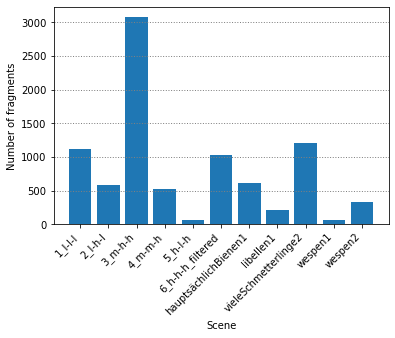

In [43]:
# number of fragments per scene
df1 = df.groupby("scene").size()
display(df1)

plt.bar(df1.index, df1)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Scene")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()


scene
1_l-l-l                 373
2_l-h-l                  75
3_m-h-h                 118
4_m-m-h                   4
6_h-h-h_filtered         22
hauptsächlichBienen1      3
libellen1                46
vieleSchmetterlinge2    121
wespen2                   3
dtype: int64

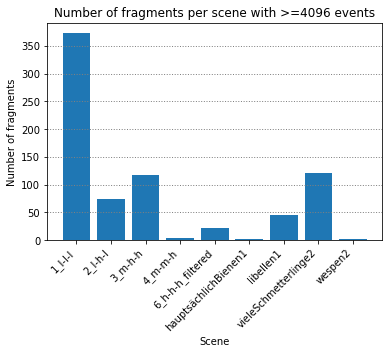

scene
1_l-l-l                 430
2_l-h-l                 110
3_m-h-h                 269
4_m-m-h                  25
6_h-h-h_filtered         32
hauptsächlichBienen1     15
libellen1                98
vieleSchmetterlinge2    286
wespen1                   2
wespen2                   9
dtype: int64

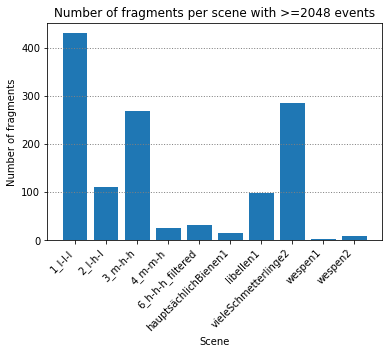

In [42]:
# number of fragments per scene WHERE >= 4096
df1 = df[df["frag_evnt_count"] >= 4096 ].groupby("scene").size()
display(df1)

plt.bar(df1.index, df1)
plt.title("Number of fragments per scene with >=4096 events")
plt.xlabel("Scene")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()


# number of fragments per scene WHERE >= 2048
df1 = df[df["frag_evnt_count"] >= 4096//2 ].groupby("scene").size()
display(df1)

plt.bar(df1.index, df1)
plt.title("Number of fragments per scene with >=2048 events")
plt.xlabel("Scene")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of fragments")
plt.grid(True, axis="y", color = "grey", linewidth = "1", linestyle = "dotted")
plt.show()
